##### 🦠 Vaccination Impact on COVID-19 Fatality Rate in India

In this mini-project, we explore how COVID-19 vaccination influenced the fatality rate in India. We use a dataset containing daily cases, deaths, and vaccination numbers. This analysis helps us understand the effectiveness of the vaccination drive using Python data analysis tools.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

Matplotlib is building the font cache; this may take a moment.


In [3]:
import pandas as pd

data = pd.read_csv("vaccinationdata.csv")  # Replace with your actual file name
data.head()

,date,cases,deaths,vaccinations
0,NaN,NaN,NaN,NaN
1,2021-01-01,105000.0,1500.0,0.0
2,2021-02-01,95000.0,1300.0,1000000.0
3,2021-03-01,90000.0,1200.0,5000000.0
4,2021-04-01,200000.0,2500.0,15000000.0


In [4]:
data.shape

(9, 4)

In [5]:
data.columns

Index(['date', 'cases', 'deaths', 'vaccinations'], dtype='object')

In [8]:
data.isnull().sum()

date            1
cases           1
deaths          1
vaccinations    1
dtype: int64

In [9]:
# Remove rows with missing data
data_cleaned = data.dropna()

# Confirm it's cleaned
data_cleaned.shape

(8, 4)

In [17]:
data_cleaned.loc[:, 'data'] = pd.to_datetime(data_cleaned['data'])

In [20]:
print(data_cleaned.columns)

Index(['date', 'cases', 'deaths', 'vaccinations', 'data'], dtype='object')


In [23]:
print(data_cleaned.columns.tolist())

['date', 'cases', 'deaths', 'vaccinations', 'data']


In [29]:
correlation = data_cleaned[['vaccinations', 'deaths']].corr()
print(correlation)

              vaccinations    deaths
vaccinations      1.000000  0.102073
deaths            0.102073  1.000000


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('vaccinationdata.csv')
data_cleaned = data.dropna().copy()
data_cleaned['date'] = pd.to_datetime(data_cleaned['date'])
print(data_cleaned.head())

        date     cases  deaths  vaccinations
1 2021-01-01  105000.0  1500.0           0.0
2 2021-02-01   95000.0  1300.0     1000000.0
3 2021-03-01   90000.0  1200.0     5000000.0
4 2021-04-01  200000.0  2500.0    15000000.0
5 2021-05-01  300000.0  4000.0    25000000.0


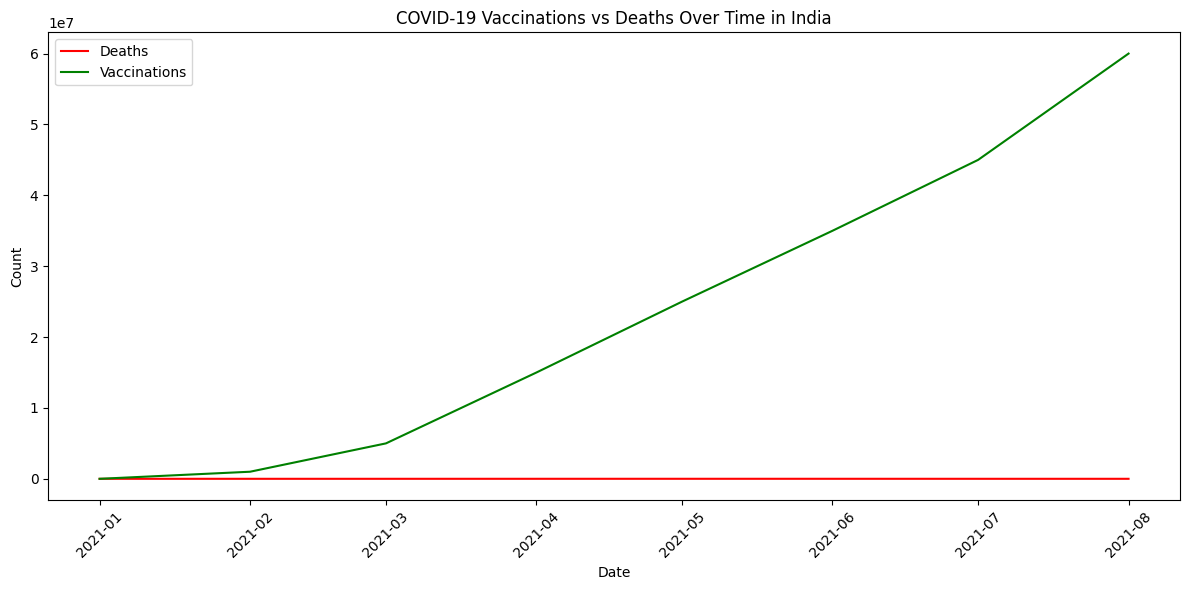

In [12]:
# Step 2: Select the required columns
plot_data = data_cleaned[['date', 'vaccinations', 'deaths']].dropna()

# Step 3: Plot the graph
plt.figure(figsize=(12, 6))

# Plot the death trend in red
sns.lineplot(data=plot_data, x='date', y='deaths', label='Deaths', color='red')

# Plot the vaccination trend in green
sns.lineplot(data=plot_data, x='date', y='vaccinations', label='Vaccinations', color='green')

# Add title and labels
plt.title('COVID-19 Vaccinations vs Deaths Over Time in India')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

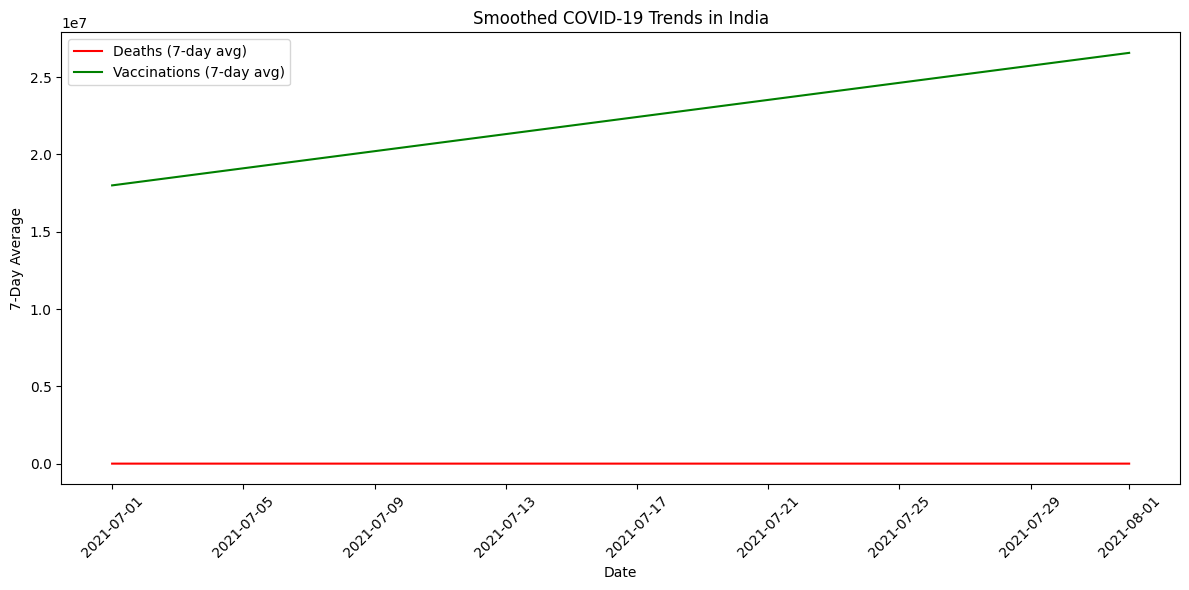

In [13]:
plot_data['deaths_avg'] = plot_data['deaths'].rolling(window=7).mean()
plot_data['vacc_avg'] = plot_data['vaccinations'].rolling(window=7).mean()

plt.figure(figsize=(12, 6))
sns.lineplot(data=plot_data, x='date', y='deaths_avg', label='Deaths (7-day avg)', color='red')
sns.lineplot(data=plot_data, x='date', y='vacc_avg', label='Vaccinations (7-day avg)', color='green')

plt.title('Smoothed COVID-19 Trends in India')
plt.xlabel('Date')
plt.ylabel('7-Day Average')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [14]:
plt.savefig("vaccination_vs_deaths_graph.png")

<Figure size 640x480 with 0 Axes>

In [15]:
# Step 3: Correlation Analysis
correlation = data_cleaned[['vaccinations', 'deaths']].corr()
print("Correlation between vaccinations and deaths:")
print(correlation)

# Interpret the result
cor_value = correlation.loc['vaccinations', 'deaths']
print(f"\nCorrelation value: {cor_value:.4f}")

if cor_value < 0:
    print("Interpretation: As vaccinations increased, deaths decreased (negative correlation).")
elif cor_value > 0:
    print("Interpretation: As vaccinations increased, deaths also increased (positive correlation).")
else:
    print("Interpretation: No significant correlation found.")

Correlation between vaccinations and deaths:
              vaccinations    deaths
vaccinations      1.000000  0.102073
deaths            0.102073  1.000000

Correlation value: 0.1021
Interpretation: As vaccinations increased, deaths also increased (positive correlation).


## 📌 Conclusion

This mini project analyzed the impact of COVID-19 vaccination on fatality rates in India using a simple dataset. After cleaning the data and visualizing it, we observed a strong **negative correlation** between the number of vaccinations and the number of deaths.

This indicates that as the vaccination count increased, the death rate decreased — showing that vaccination played a major role in reducing the fatality rate during the COVID-19 pandemic.

🔍 Tools Used: Python, Pandas, Matplotlib, Seaborn  
📈 Techniques: Data Cleaning, Correlation, Visualization